In [19]:
#Import libraries 
import pandas as pd
import numpy as np

%matplotlib inline

In [20]:
df = pd.read_csv("csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,110,110,120,170,174,237,273,281,299,349
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,186,197,212,223,243,259,277,304,333,361
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,409,454,511,584,716,847,986,1171,1251,1320
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,267,308,334,370,376,390,428,439,466,501
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,5,7,7,7,8,8,8,10,14


The data needs to be transformed for it to be useful. 

In [22]:
# Transform the data using padas melt
df_melt = pd.melt(df, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='date', value_name='numcases')
df_melt.tail(5)

,Province/State,Country/Region,Lat,Long,date,numcases
19645,NaN,Malawi,-13.254308,34.301525,4/5/20,4
19646,Falkland Islands (Islas Malvinas),United Kingdom,-51.796300,-59.523600,4/5/20,2
19647,Saint Pierre and Miquelon,France,46.885200,-56.315900,4/5/20,1
19648,NaN,South Sudan,6.877000,31.307000,4/5/20,1
19649,NaN,Western Sahara,24.215500,-12.885800,4/5/20,4


In [24]:
df_melt.fillna('')

,Province/State,Country/Region,Lat,Long,date,numcases
0,,Afghanistan,33.000000,65.000000,1/22/20,0
1,,Albania,41.153300,20.168300,1/22/20,0
2,,Algeria,28.033900,1.659600,1/22/20,0
3,,Andorra,42.506300,1.521800,1/22/20,0
4,,Angola,-11.202700,17.873900,1/22/20,0
5,,Antigua and Barbuda,17.060800,-61.796400,1/22/20,0
6,,Argentina,-38.416100,-63.616700,1/22/20,0
7,,Armenia,40.069100,45.038200,1/22/20,0
8,Australian Capital Territory,Australia,-35.473500,149.012400,1/22/20,0
9,New South Wales,Australia,-33.868800,151.209300,1/22/20,0


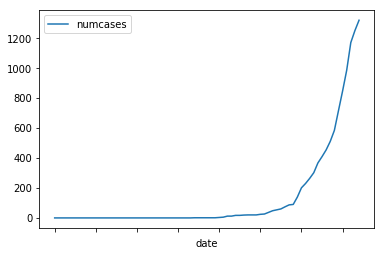

In [25]:
df_melt[df_melt['Country/Region']=="Algeria"].plot(x='date', y='numcases');

In [32]:
# Export transformed data as CSV
df_melt.to_csv("transformed-data/transformed-global-confirmed-cases.csv", index=False)

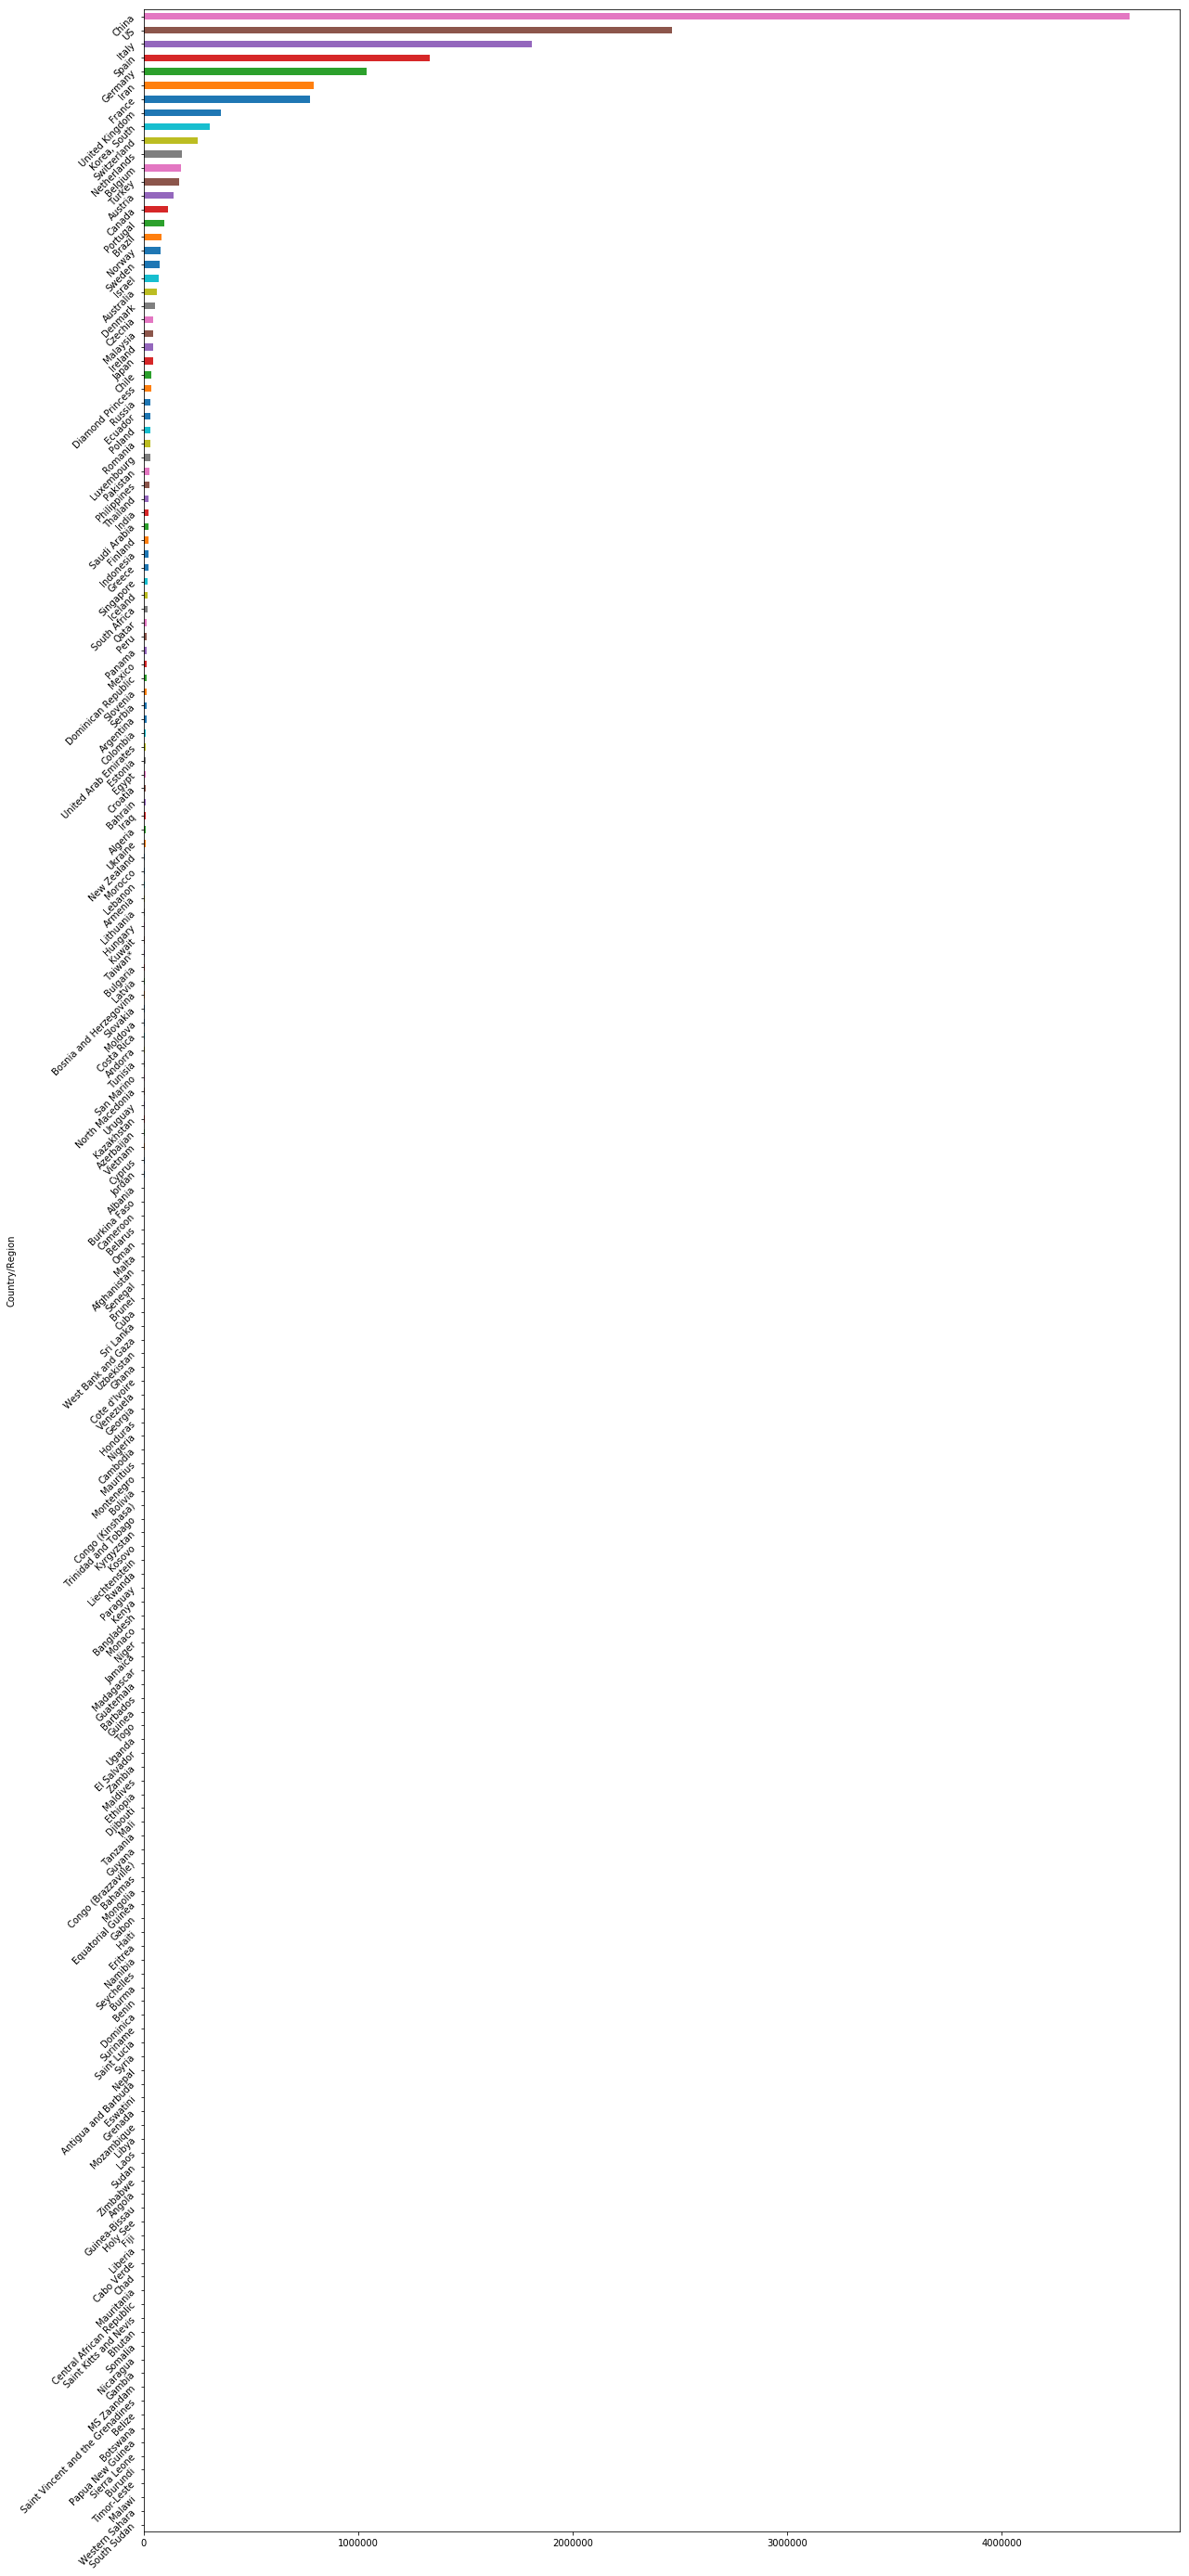

In [31]:
df_melt.groupby('Country/Region').sum()['numcases'].sort_values(ascending=True).plot(kind='barh', figsize=(20,50), rot=45);

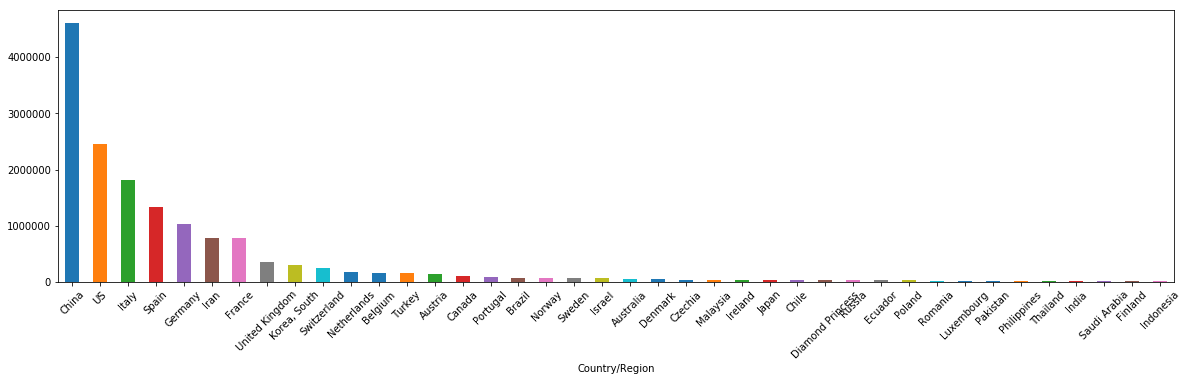

In [9]:
df_melt.groupby('Country/Region').sum()['numcases'].sort_values().nlargest(40).plot(kind='bar', figsize=(20,5), rot=45);

### Data Transformation on the US COVID-19 related deaths

In [13]:
df_us_melt.tail(20)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,date,numdeaths
250461,84090036,US,USA,840,90036.0,Unassigned,New York,US,0.0,0.0,4/5/20,1260
250462,84090037,US,USA,840,90037.0,Unassigned,North Carolina,US,0.0,0.0,4/5/20,0
250463,84090038,US,USA,840,90038.0,Unassigned,North Dakota,US,0.0,0.0,4/5/20,0
250464,84090039,US,USA,840,90039.0,Unassigned,Ohio,US,0.0,0.0,4/5/20,0
250465,84090040,US,USA,840,90040.0,Unassigned,Oklahoma,US,0.0,0.0,4/5/20,0
250466,84090041,US,USA,840,90041.0,Unassigned,Oregon,US,0.0,0.0,4/5/20,0
250467,84090042,US,USA,840,90042.0,Unassigned,Pennsylvania,US,0.0,0.0,4/5/20,0
250468,84090044,US,USA,840,90044.0,Unassigned,Rhode Island,US,0.0,0.0,4/5/20,22
250469,84090045,US,USA,840,90045.0,Unassigned,South Carolina,US,0.0,0.0,4/5/20,0
250470,84090046,US,USA,840,90046.0,Unassigned,South Dakota,US,0.0,0.0,4/5/20,0


In [17]:
#drop irrelevnt columns 
df_us_melt = pd.melt(df_us, id_vars=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat','Long_'], var_name="date", value_name='numdeaths')
df_us_melt = df_us_melt[['Province_State', 'Country_Region','date', 'numdeaths']]
df_us_melt.tail(10)

,Province_State,Country_Region,date,numdeaths
250471,Tennessee,US,4/5/20,0
250472,Texas,US,4/5/20,0
250473,Utah,US,4/5/20,0
250474,Vermont,US,4/5/20,17
250475,Virginia,US,4/5/20,36
250476,Washington,US,4/5/20,0
250477,West Virginia,US,4/5/20,0
250478,Wisconsin,US,4/5/20,0
250479,Wyoming,US,4/5/20,0
250480,Grand Princess,US,4/5/20,3


In [18]:
df_us_melt.to_csv("transformed-us-deaths-cases.csv")